In [1]:
%load_ext autoreload
%autoreload 2
from vae import VAE
from keras.datasets import mnist
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.
/home/wxdata/5/chrism/sw/anaconda3/envs/tf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/wxdata/5/chrism/sw/anaconda3/envs/tf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/wxdata/5/chrism/sw/anaconda3/envs/tf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Load MNIST Data and split into test/train

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train_re = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test_re = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
print(x_train_re.shape)
print(x_test_re.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 784)
(10000, 784)


## Instaniate Bernoulli-Gaussian VAE and Load Params

In [3]:
param_path = '/home/wxdata/5/chrism/sandbox/vae/params/'
v = VAE(param_file=param_path + 'bernoulli_gauss_mnist.json')
print(v.params)
v.construct()


Batch Size: 100
Num Epochs: 50
Number of Samples: 10

VAE Type: BernoulliGaussian

Optimizer: Adagrad
Learning Rate: 0.01


Name: Input
Type: Input
Output to Loss: False
Shape: (784,)



Name: Encode1
Type: Dense
Output to Loss: False
Size: 256
Activation: relu
Reshape: None 



Name: params_layer
Type: DenseKD
Output to Loss: True
K: 2
Concat: False

-----
Name: mu
Type: Dense
Output to Loss: False
Size: 2
Activation: linear
Reshape: None 

-----

-----
Name: log_sigma
Type: Dense
Output to Loss: False
Size: 2
Activation: linear
Reshape: None 

-----



Name: Sample1
Type: Sample
Output to Loss: False
Size: 2
Distribution: Gaussian



Name: Decode1
Type: Dense
Output to Loss: False
Size: 256
Activation: relu
Reshape: None 



Name: Decode2
Type: Dense
Output to Loss: False
Size: 784
Activation: relu
Reshape: None 






## Optionall Load a Previously Trained Model

In [66]:
LOAD_MODEL = True
if LOAD_MODEL :
    v.model.load_weights('/home/wxdata/5/chrism/sandbox/vae/saved_models/bernoulli_gauss_mnist.h5')

## Fit the VAE

In [4]:
v.fit(x_train_re > 0.5, shuffle=True)

Epoch 1/50
60000/60000 [==============================] - 11s 184us/step - loss: 311.1843
Epoch 2/50
60000/60000 [==============================] - 3s 50us/step - loss: 300.1939
Epoch 3/50
60000/60000 [==============================] - 3s 48us/step - loss: 297.0846
Epoch 4/50
60000/60000 [==============================] - 3s 44us/step - loss: 295.0668
Epoch 5/50
60000/60000 [==============================] - 2s 40us/step - loss: 294.6008
Epoch 6/50
60000/60000 [==============================] - 2s 41us/step - loss: 293.8788
Epoch 7/50
60000/60000 [==============================] - 2s 41us/step - loss: 293.3218
Epoch 8/50
60000/60000 [==============================] - 2s 40us/step - loss: 292.2500
Epoch 9/50
60000/60000 [==============================] - 2s 39us/step - loss: 290.7041
Epoch 10/50
60000/60000 [==============================] - 2s 40us/step - loss: 292.0563
Epoch 11/50
60000/60000 [==============================] - 2s 40us/step - loss: 290.4909
Epoch 12/50
60000/60000 [===

In [ ]:
v.model.save_weights('/home/gridsan/CH24434/school/vae/saved_models/model1_weights_nomean.h5')

# Run model on test data

In [67]:
pred = v.model.predict(x_test_re > 0.5, batch_size=100).reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2])
print(pred.shape)

(10000, 28, 28)


# Calculate Reconstruction Loss

<IPython.core.display.Javascript object>


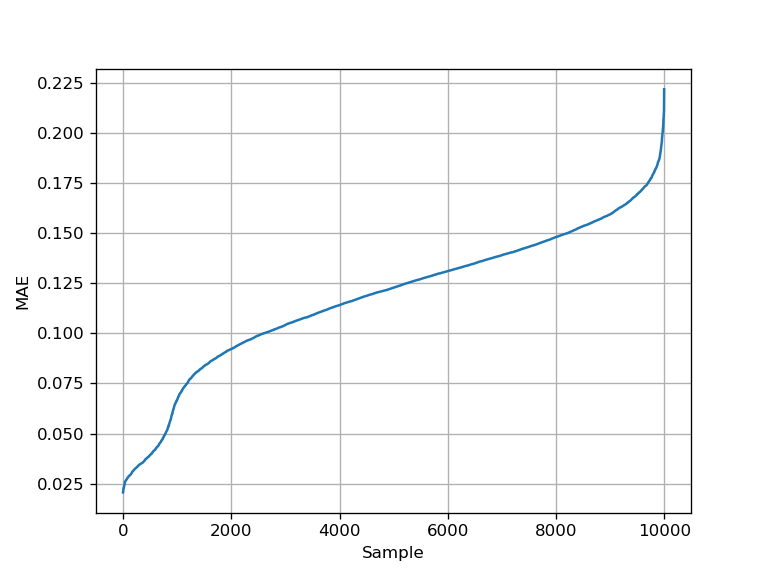

In [101]:
%matplotlib notebook
pred[pred > 1.] = 1.
err = (1./784)*np.abs(x_test-pred).sum((1,2))
plt.plot(np.sort(err))
plt.xlabel('Sample')
plt.ylabel('MAE')
plt.grid()
plt.show()

# Encode Test Data

In [70]:
z = v.encode(x_test_re > 0.5, 'mu')
#z = v.encode(x_test_re > 0.5, 'log_sigma', skip=['mu'])
print(z.shape)

(10000, 2)


<IPython.core.display.Javascript object>


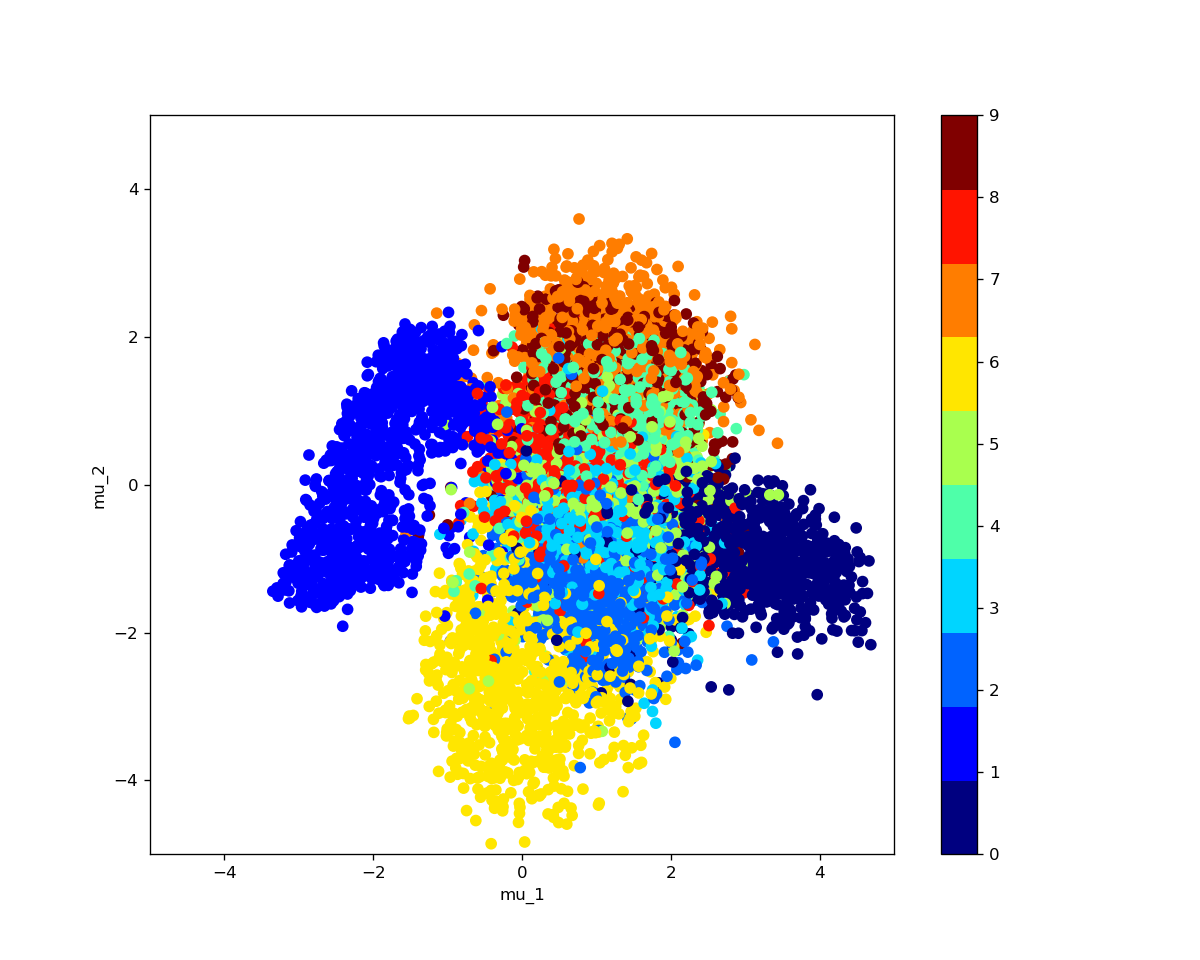

In [71]:
%matplotlib notebook
cmap = plt.get_cmap('jet', 10)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
s = ax.scatter(z[:,0],z[:,1],c=y_test,cmap=cmap)
ax.set_xlabel('mu_1')
ax.set_ylabel('mu_2')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
fig.colorbar(s,ax=ax)

# Decode Sample Data

In [85]:
Z = np.array([[3.5,-1],
              [0,-4],
              [-3,-1],
              [1,2.8]])

<IPython.core.display.Javascript object>


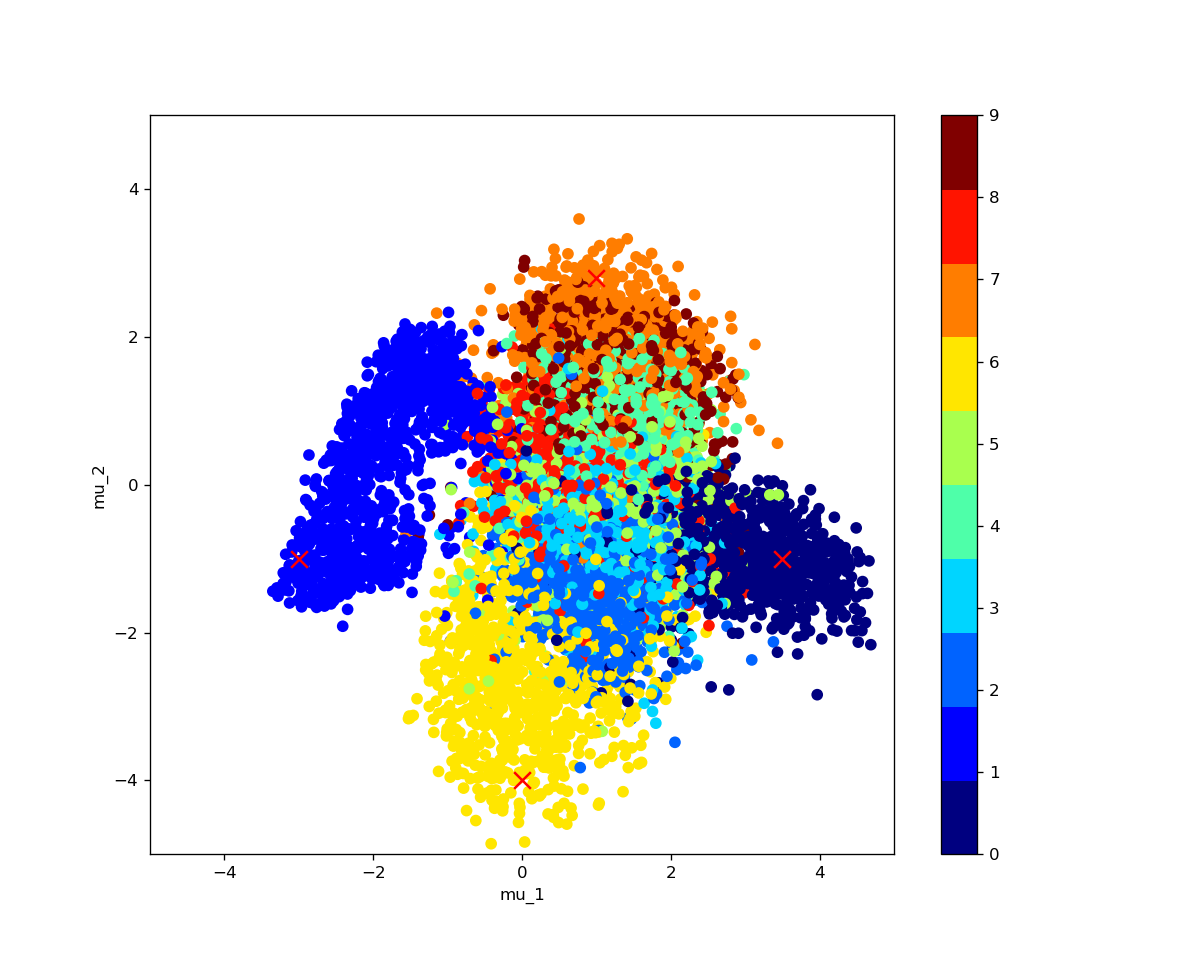

In [86]:
%matplotlib notebook
cmap = plt.get_cmap('jet', 10)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
s = ax.scatter(z[:,0],z[:,1],c=y_test,cmap=cmap)
ax.scatter(Z[:,0],Z[:,1],c='r',marker='x',s=100)
ax.set_xlabel('mu_1')
ax.set_ylabel('mu_2')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
fig.colorbar(s,ax=ax)

In [87]:
x = v.decode(Z, 'Decode1').reshape(Z.shape[0], 28, 28)
print(x.shape)

(4, 28, 28)


<IPython.core.display.Javascript object>


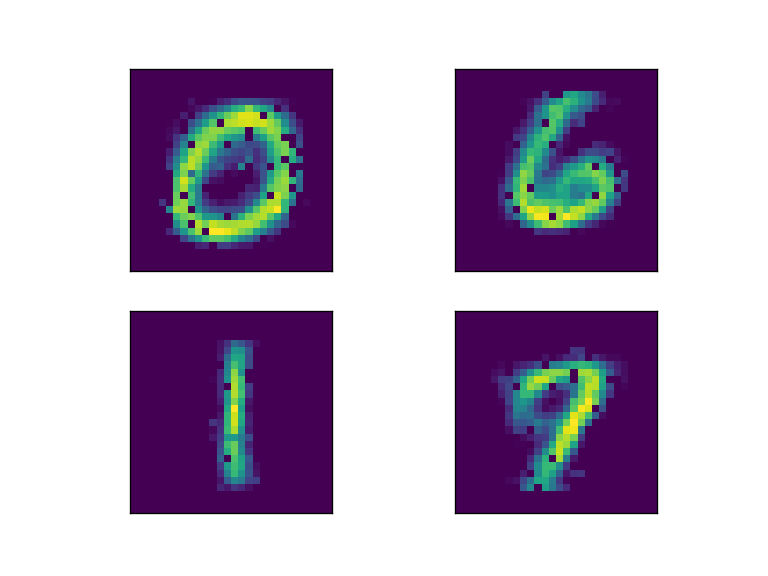

In [88]:
%matplotlib notebook
THRESH = None

for i in np.arange(0,x.shape[0]) :
    plt.subplot(2,2,i+1)
    if THRESH :
        plt.imshow(x[i,:,:] > THRESH)
    else :
        plt.imshow(x[i,:,:])
    #plt.colorbar()
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
plt.show()